# Objectives

1. Study the greedy algorithm design technique.
2. To implement in a programming language algorithms Prim and Kruskal. 
3. Empirical analyses of the Kruskal and Prim
4. Increase the number of nodes in graph and analyze how this influences the algorithms. Make a graphical presentation of the data obtained
6. Make a conclusion on the work done


## Implementation


## Setup


In [73]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../shared')
from decorators import *
from benchmarking import *


### Generating the graphs


In [74]:
import networkx as nx
import random
SEED = 42

rand = random.Random(SEED)

# complete graph, weights 1-100
def get_complete_graph(n: int):
    G = nx.complete_graph(n)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = rand.randint(1, 100)
    return G


### 1. Implement the algorithms listed below in a programming language (python)


In [75]:
import networkx as nx
from queue import PriorityQueue
from typing import List

def kruskal(G: nx.Graph) -> List[nx.Graph]:
    mst = []
    sets = [{u} for u in G.nodes()]
    edges = list(G.edges(data='weight'))
    edges.sort(key=lambda x: x[2])
    for (u, v, w) in edges:
        set_u = None
        set_v = None
        for s in sets:
            if u in s:
                set_u = s
            if v in s:
                set_v = s
        if set_u != set_v:
            mst.append((u, v))
            set_u |= set_v
            sets.remove(set_v)
        if len(mst) == len(G) - 1:
            break
    return [G.edge_subgraph(mst)]

def prim(graph: nx.Graph) -> nx.Graph:
    T = nx.Graph()
    T.add_node(0)
    while len(T) < len(graph):
        min_edge = None
        min_weight = float('inf')
        for u in T.nodes():
            for v in graph.neighbors(u):
                if v not in T:
                    weight = graph.edges[u, v]['weight']
                    if weight < min_weight:
                        min_edge = (u, v)
                        min_weight = weight
        T.add_node(min_edge[1])
        T.add_edge(*min_edge, weight=min_weight)

The 2 sets of inputs are going to be graphs with an exponentially increasing number of nodes, one set being sparse and another one being dense.

In [76]:
algorithms= [kruskal, prim]

def exponential_yielder(start: int, end: int, step: int) -> int:
    i = start
    while i < end:
        yield i
        i *= step

LIMIT = 1000

graphs = [get_complete_graph(n) for n in exponential_yielder(10, LIMIT, 2)]


### 3. Choose metrics for comparing algorithms

The metric that will be used for comparing the algorithms is running time.


### 4. Perform empirical analysis of the proposed algorithms

The utility functions defined in the previous laboratories will be used to benchmark the running time of the algorithms.


In [77]:
results = benchmark_single_thread(algorithms, graphs)


In [78]:
# print table
import pandas as pd
columns=list(exponential_yielder(10, LIMIT, 2))

df = pd.DataFrame(results.values(), index=results.keys(), columns=columns)

print(df)

            10      20       40        80         160         320          640
kruskal  0.5131  1.0847   4.8809   18.2613    83.2167    272.5764    1104.2074
prim     0.6227  3.5125  24.8348  192.2931  1890.3086  15950.2386  127958.1793


### 5. Make a graphical presentation of the data obtained

The following chart show the running time of each algorithm on the chosen graphs.

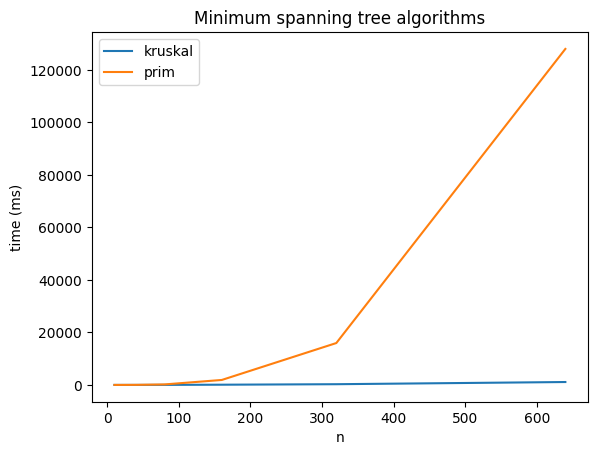

In [79]:
plot_results(results, columns, title="Minimum spanning tree algorithms")

The rest of the source code can be accessed publicly on GitHub: [https://github.com/prenaissance/labs-2022](https://github.com/prenaissance/labs-2022) 

# Conclusion

In this laboratory work, I compared the efficiency of 2 greedy algorithms for determining the shortest spanning tree of a graph: Prim and Kruskal.

The graphs used for benchmarking in this laboratory work were extremely sparse, being complete graphs, to show the weakness of the Prim algorithm. The Kruskal algorithm is more efficient in this case. Not only does it have an edge over Prim in terms of running time, but it also has a better memory complexity and can be used for finding shortest spanning forests.

Both algorithms are straightforward to implement, but I think that Kruskal is more elegant and easier to understand.